# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes code to get started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [22]:
import pandas as pd

In [47]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [49]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [50]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [51]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [52]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [53]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [54]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=["sales_channel", "trip_type", "route"], drop_first=True)

In [55]:
df_encoded = pd.get_dummies(df_encoded, columns=["booking_origin"], drop_first=True)

In [56]:
# Split data into features (X) and target (y)
X = df_encoded.drop(columns=["booking_complete"])
y = df_encoded["booking_complete"]

In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8533


In [60]:
# Cross-validation
cv_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy').mean()
print("Cross-validation Accuracy:", cv_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-validation Accuracy: 0.7064600000000001

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000



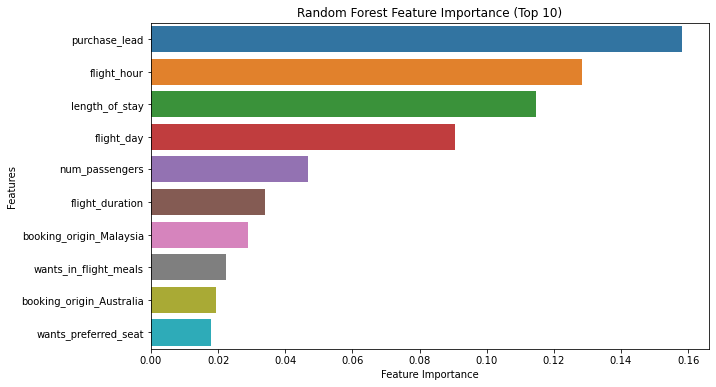

In [61]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance (Top 10)')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

In [63]:
# Evaluate the model
print("Cross-validation Accuracy:", grid_search.best_score_)
print("\nBest Model Hyperparameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Cross-validation Accuracy: 0.8515499999999999

Best Model Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000



In [66]:
from sklearn.metrics import roc_auc_score



# Get the probability scores of positive class
y_scores = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_scores)
print(f"ROC AUC Score: {auc_score}")

ROC AUC Score: 0.7965986232711584


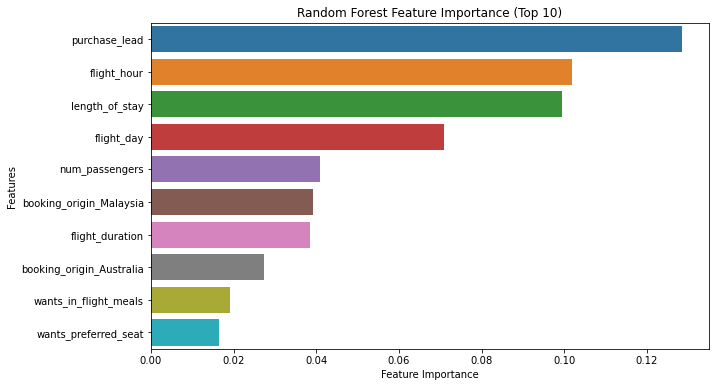

In [65]:
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance (Top 10)')
plt.show()


In [43]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# 1. Addressing Class Imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# 2. Feature Engineering (if applicable)
# Example: Add new feature or transform existing ones

# 3. Ensemble Methods (Gradient Boosting)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
y_pred_gb = cross_val_predict(gb_model, X_resampled, y_resampled, cv=5)

# 4. Model Evaluation (Gradient Boosting)
print("Classification Report (Gradient Boosting):")
print(classification_report(y_resampled, y_pred_gb))


Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.76      0.65      0.70     34002
           1       0.69      0.79      0.74     34002

    accuracy                           0.72     68004
   macro avg       0.73      0.72      0.72     68004
weighted avg       0.73      0.72      0.72     68004

